In [31]:
import pandas as pd
import numpy as np
import ast
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt
import contextily as ctx

In [21]:
df = pd.read_csv('bird_data.csv')

In [22]:
df.drop(['code', 'captive'], axis=1, inplace=True)

In [35]:
def add_lat_long(df):
    loc_array = df['location']
    
    loc_list= []
    for i in loc_array:
        loc_list.append(ast.literal_eval(i))
    
    new_df = pd.concat([df, pd.DataFrame(loc_list)], axis=1)
    return new_df

In [36]:
new_df = add_lat_long(df)
new_df['coordinates'] = list(zip(new_df.longitude, new_df.latitude))

In [25]:
new_df['coordinates'] = new_df['coordinates'].apply(Point)

In [26]:
gdf = geopandas.GeoDataFrame(new_df, geometry='coordinates')

In [27]:
w, s, e, n = gdf.total_bounds

In [28]:
%time img, ext = ctx.bounds2img(w, s, e, n, 12, ll=True)

CPU times: user 34.5 ms, sys: 9.16 ms, total: 43.7 ms
Wall time: 216 ms


In [29]:
gdf.crs = {'init': 'epsg:4326'}

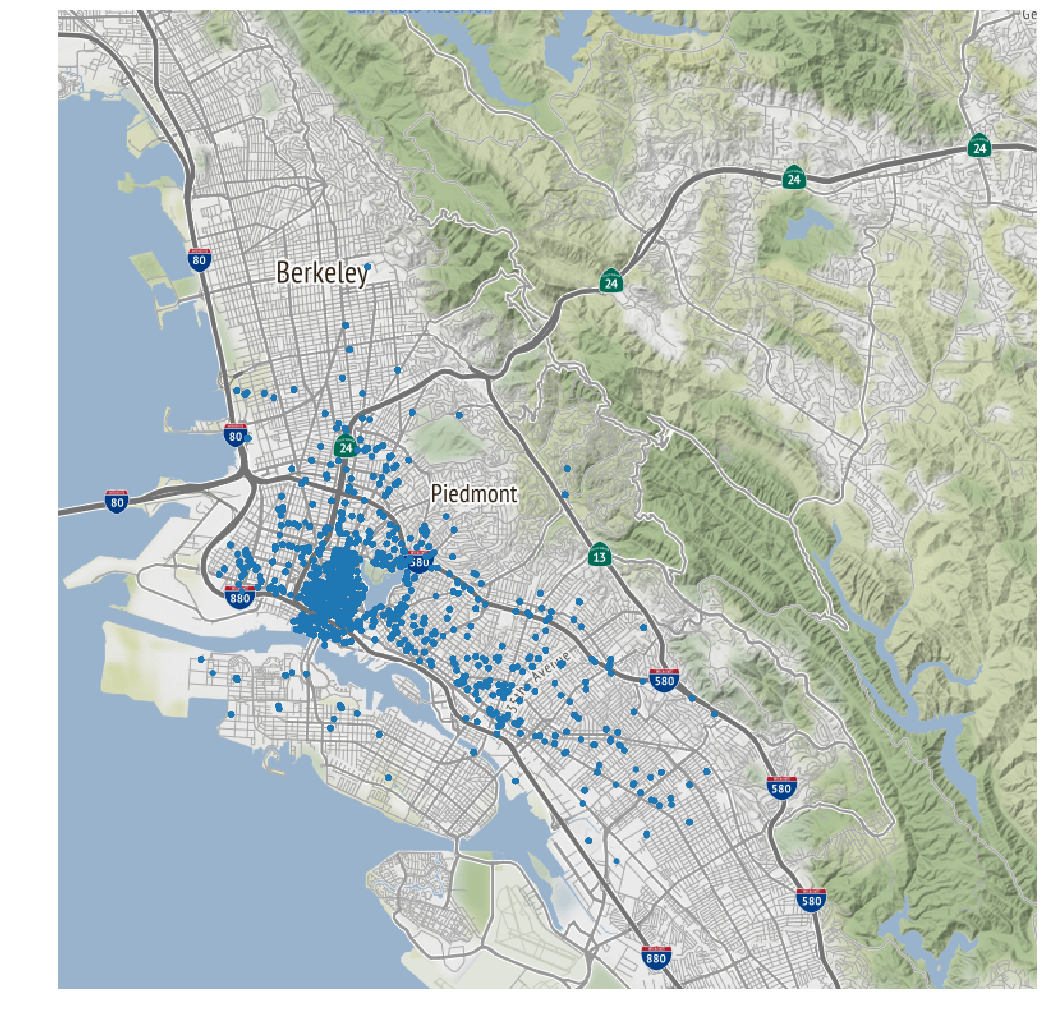

In [30]:
#fetch image using the bounding box:
image, extent = ctx.bounds2img(w, s, e, n, 12, ll=True)
# Set up the figure
f,ax = plt.subplots(1, figsize=(18,18))
# Load the tile raster 
# (note that the extent returned by bounds2img
# corresponds directly to matplotlib bounds)
ax.imshow(image, extent=extent)
# Overlay the polygon on top 
# Note we reproject the vector to webmercator, which has an epsg code of 3857
gdf.to_crs(epsg=3857).plot(edgecolor='none', ax=ax)
# Remove axis for aesthetics
ax.set_axis_off()
# Show
plt.show()

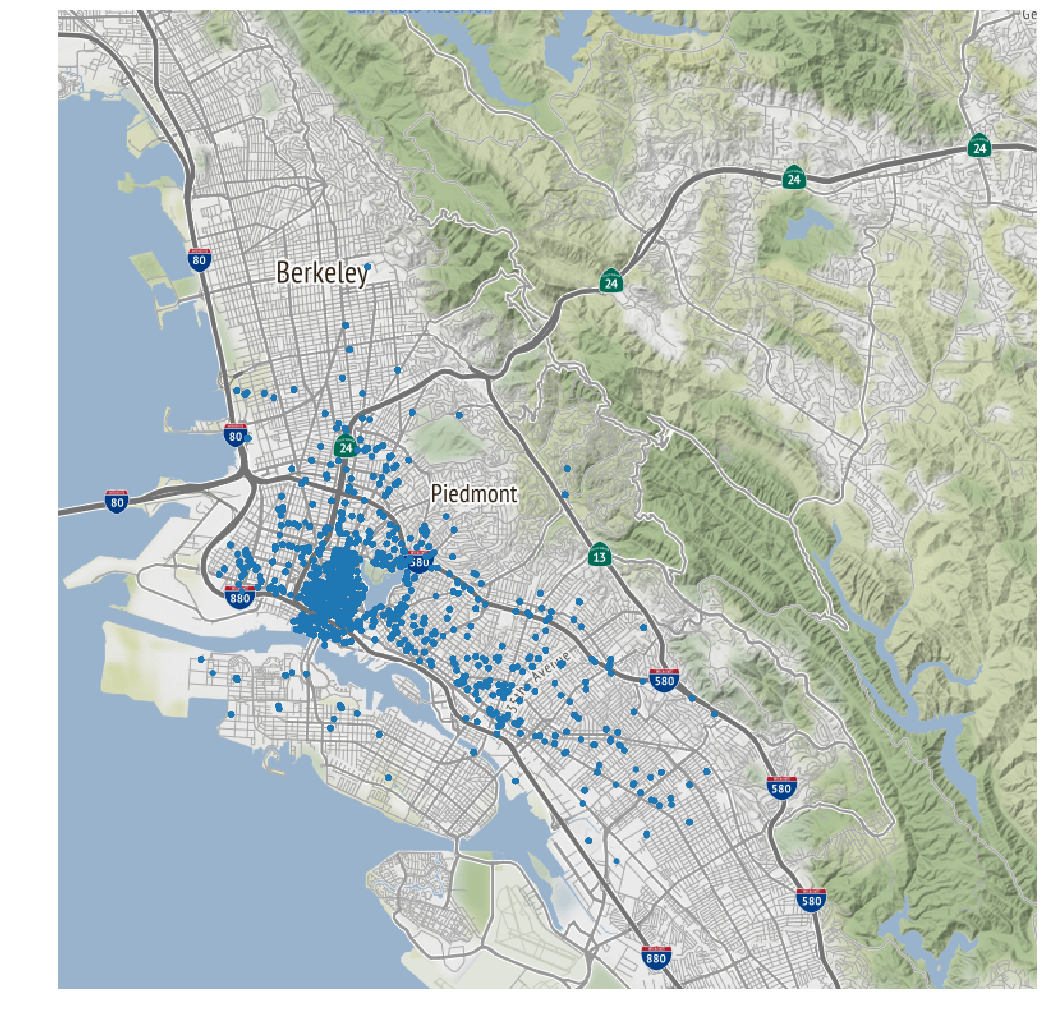

In [32]:
#fetch image using the bounding box:
image, extent = ctx.bounds2img(w, s, e, n, 12, ll=True)
# Set up the figure
f,ax = plt.subplots(1, figsize=(18,18))
# Load the tile raster 
# (note that the extent returned by bounds2img
# corresponds directly to matplotlib bounds)
ax.imshow(image, extent=extent)
# Overlay the polygon on top 
# Note we reproject the vector to webmercator, which has an epsg code of 3857
gdf.to_crs(epsg=3857).plot(edgecolor='none', ax=ax)
# Remove axis for aesthetics
ax.set_axis_off()
# Show
plt.show()